<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Devansh/CP01_Data_Alchemists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Data Pre-processing and Analysis

In [1]:
!mkdir data

In [2]:
!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:05<00:00, 124MB/s]


In [3]:
!unzip /content/data/CP01.zip -d /content/data

Archive:  /content/data/CP01.zip
  inflating: /content/data/For_modeling.csv  
  inflating: /content/data/cleaned_seoul_bike_data.csv  


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/data/For_modeling.csv',
                  dtype={
                      'Duration': 'int16',
                      'Distance': 'int16',
                      'PLong': 'float32',
                      'PLatd': 'float32',
                      'DLong': 'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'
                  },index_col=0
                  )
data = data.reset_index().drop(columns=['index'])
data.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int16  
 1   Distance    int16  
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float64
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float64
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(11), float64(2), int16(2), int8(10)
memory usage: 677.6 MB


# Seoul Trip Data Features

Here is a description of the parameters and features in the Seoul trip dataset:

| Abbreviation | Parameters/Features         | Type        | Measurement                  |
|--------------|-----------------------------|-------------|------------------------------|
| Duration     | Trip duration               | Continuous  | |
| Distance     | Trip distance               | Continuous  | |
| PLong        | Pickup longitude            | Continuous  | Radians                      |
| PLatd        | Pickup latitude             | Continuous  | Radians                      |
| DLong        | Dropoff longitude           | Continuous  | Radians                      |
| DLatd        | Dropoff latitude            | Continuous  | Radians                      |
| Haversine    | Haversine distance          | Continuous  | Kilometres                   |
| Pmonth       | Pickup month                | Categorical | January, February, March, … December |
| Pday         | Pickup day                  | Categorical | 1, 2, 3, … 31               |
| Phour        | Pickup hour                 | Categorical | 0, 1, 2, … 23               |
| Pmin         | Pickup minute               | Continuous  | 1, 2, 3, … 60               |
| PDweek       | Pickup day of the week      | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Dmonth       | Dropoff month               | Categorical | January, February, March, … December |
| Dday         | Dropoff day                 | Categorical | 1, 2, 3, … 31               |
| Dhour        | Dropoff hour                | Categorical | 0, 1, 2, … 23               |
| Dmin         | Dropoff minute              | Continuous  | 1, 2, 3, … 60               |
| DDweek       | Dropoff day of the week     | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Temp         | Temperature                 | Continuous  | °C                           |
| Precip       | Precipitation               | Continuous  | Mm                           |
| Wind         | Wind speed                  | Continuous  | m/s                          |
| Humd         | Humidity                    | Continuous  | %                            |
| Solar        | Solar radiation             | Continuous  | MJ/m2                        |
| Snow         | Snowfall                    | Continuous  | cm                           |
| GroundTemp   | Ground temperature          | Continuous  | °C                           |
| Dust         | 1-hour average fine dust concentration | Continuous | ㎍/㎥             |


In [ ]:
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
data_with_zero_displacement = data[data['Haversine']==0]
data_with_zero_displacement.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
26,18,1600,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
139,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,...,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
159,43,1940,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
206,13,490,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data_with_zero_displacement.shape

(955083, 25)

In [ ]:
data.shape

(9601139, 25)

Out of 9601139 recorded trips, 955083 are round-trips, meaning the rider has dropped the bike from where he picked up it! Logically, it doesn't make sense to include this data in predicting future bike trips duration from one point to another as the pickup and dropoff point being same, we cannot get any idea about the rider's whereabouts in between the trip from this data.

In [6]:
# Check if pickup and dropoff coordinates are the same
same_coordinates_mask = np.logical_and(data['PLong'] == data['DLong'], data['PLatd'] == data['DLatd'])

# Filter the data based on both conditions
filtered_data = data[~(same_coordinates_mask & (data['Haversine'] == 0))]

In [ ]:
filtered_data.shape

(8646056, 25)

In [7]:
# removing the tuples for which haversine == 0
filtered_data = data[data['Haversine'] != 0]

In [ ]:
filtered_data.shape

(8646056, 25)

## Verifying all of the features' values

In [ ]:
pd.set_option('display.max_columns', None)
filtered_data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06
mean,2.314345e+01,3.489543e+03,3.754772e+01,1.269909e+02,3.754782e+01,1.269908e+02,2.076918e+00,7.602102e+00,1.578030e+01,1.423248e+01,2.912769e+01,2.916600e+00,7.602499e+00,1.577990e+01,1.427496e+01,3.003549e+01,2.918615e+00,1.837109e+01,1.814095e-02,1.806268e+00,5.428914e+01,7.116840e-01,1.020934e-02,2.044014e+01,3.247510e+01
std,2.286414e+01,3.703603e+03,4.430949e-02,8.236528e-02,4.435297e-02,8.310713e-02,1.998044e+00,2.710842e+00,8.746445e+00,6.334764e+00,1.725796e+01,1.963908e+00,2.710829e+00,8.746214e+00,6.535078e+00,1.730486e+01,1.965282e+00,9.588562e+00,3.800871e-01,9.711955e-01,1.743514e+01,9.070460e-01,1.648211e-01,1.270838e+01,2.412606e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,1.200000e+03,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.277592e-01,6.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.500000e+01,2.180000e+03,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404650e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,4.280000e+03,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.556391e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


### Checks:
1. `Duration`: check for values that aren't too big or negative.
There are no trips found with such values of duration.
2. `Distance`: check for no negative distances or extreme outliers. None found.
3. `PLong` and `DLong`: Check that longitude values are within the valid range of -180 to 180 degrees. None found.
4. `PLatd` and `DLatd`: Check that latitude values are within the valid range of -90 to 90 degrees. None found.
5. `Haversine`: computed from PLong, DLong, PLatd and DLatd.
6. `Pmonth, Pday, Phour, Pmin, PDweek, Dmonth, Dday, Dhour, Dmin, DDweek`: Check for months (1-12), days (1-31), hours (0-23), minutes (0-59), and days of the week (0-6). Everything is in check.
7. `Temp, Precip, Wind, Humid, Solar, Snow, GroundTemp, Dust`: Check for unrealistic values and outliers based on current known range for these weather parameters.

**Check for duplicate values**


In [ ]:
filtered_data.duplicated().value_counts()

False    8636811
True        9245
dtype: int64

This gives an indication that out of 8646056 tupples, 9245 tupples are duplicates.

In [8]:
#Remove all duplicates
filtered_data.drop_duplicates(inplace=True)
print("Dataset size after removing duplicates:", filtered_data.shape)

Dataset size after removing duplicates: (8636811, 25)


<ipython-input-8-ca0abfc58edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop_duplicates(inplace=True)


### Visualization

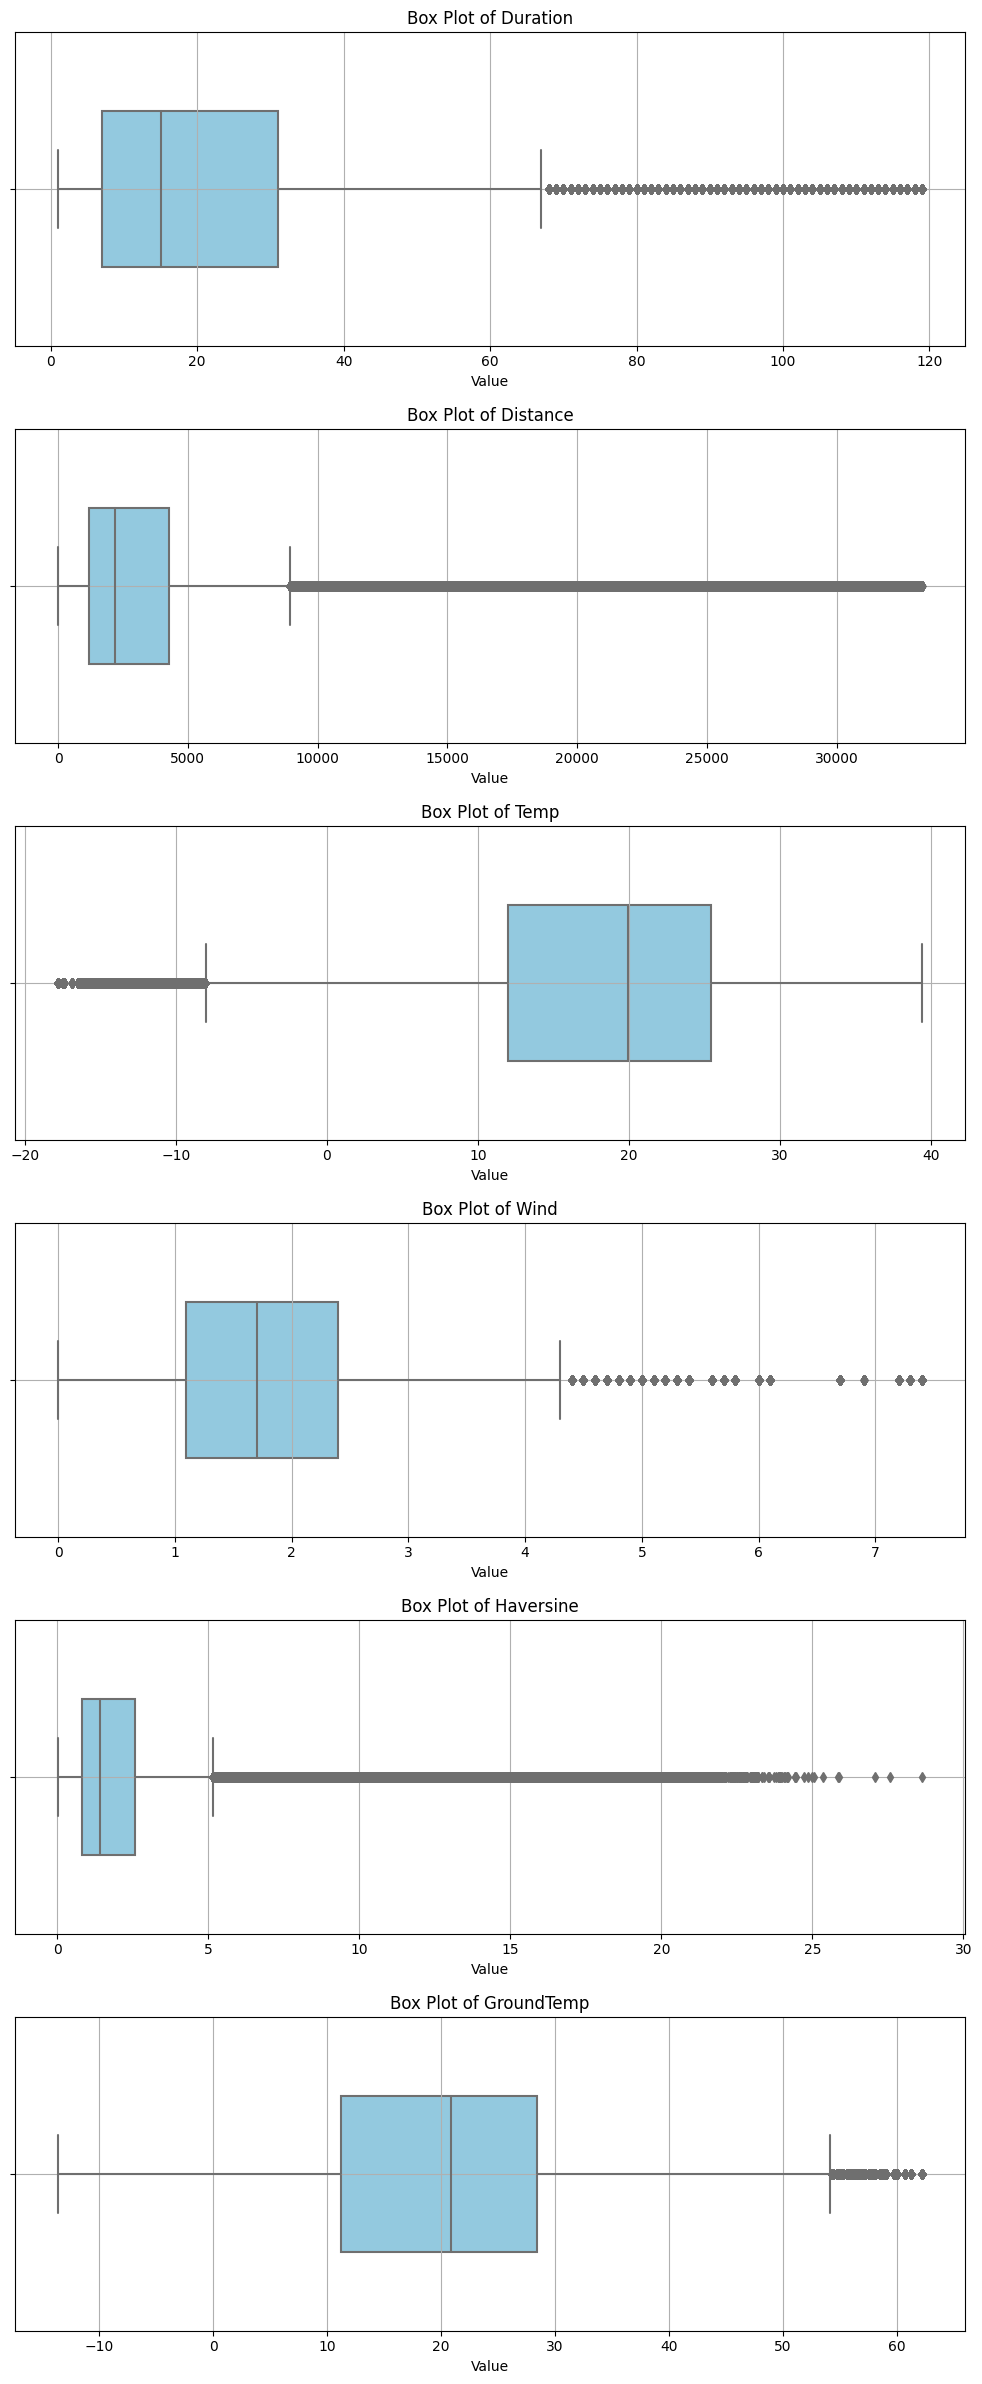

In [ ]:
columns_to_plot = [
    'Duration', 'Distance','Temp','Wind','Haversine', 'GroundTemp'
]

num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4*num_plots))


sns.set(style="whitegrid")

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x=filtered_data[column], ax=ax, color='skyblue', width=0.5)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
columns_for_histograms = [
    'Duration', 'Distance', 'Dhour', 'Phour', 'PLong',
    'PLatd', 'DLong', 'DLatd', 'Snow', 'GroundTemp', 'Dust', 'Pmonth'
]

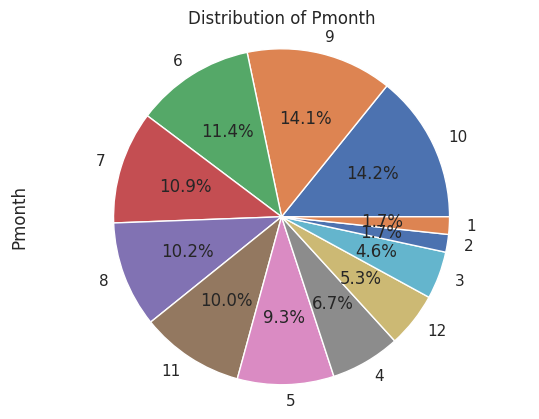

In [ ]:
filtered_data['Pmonth'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Pmonth')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

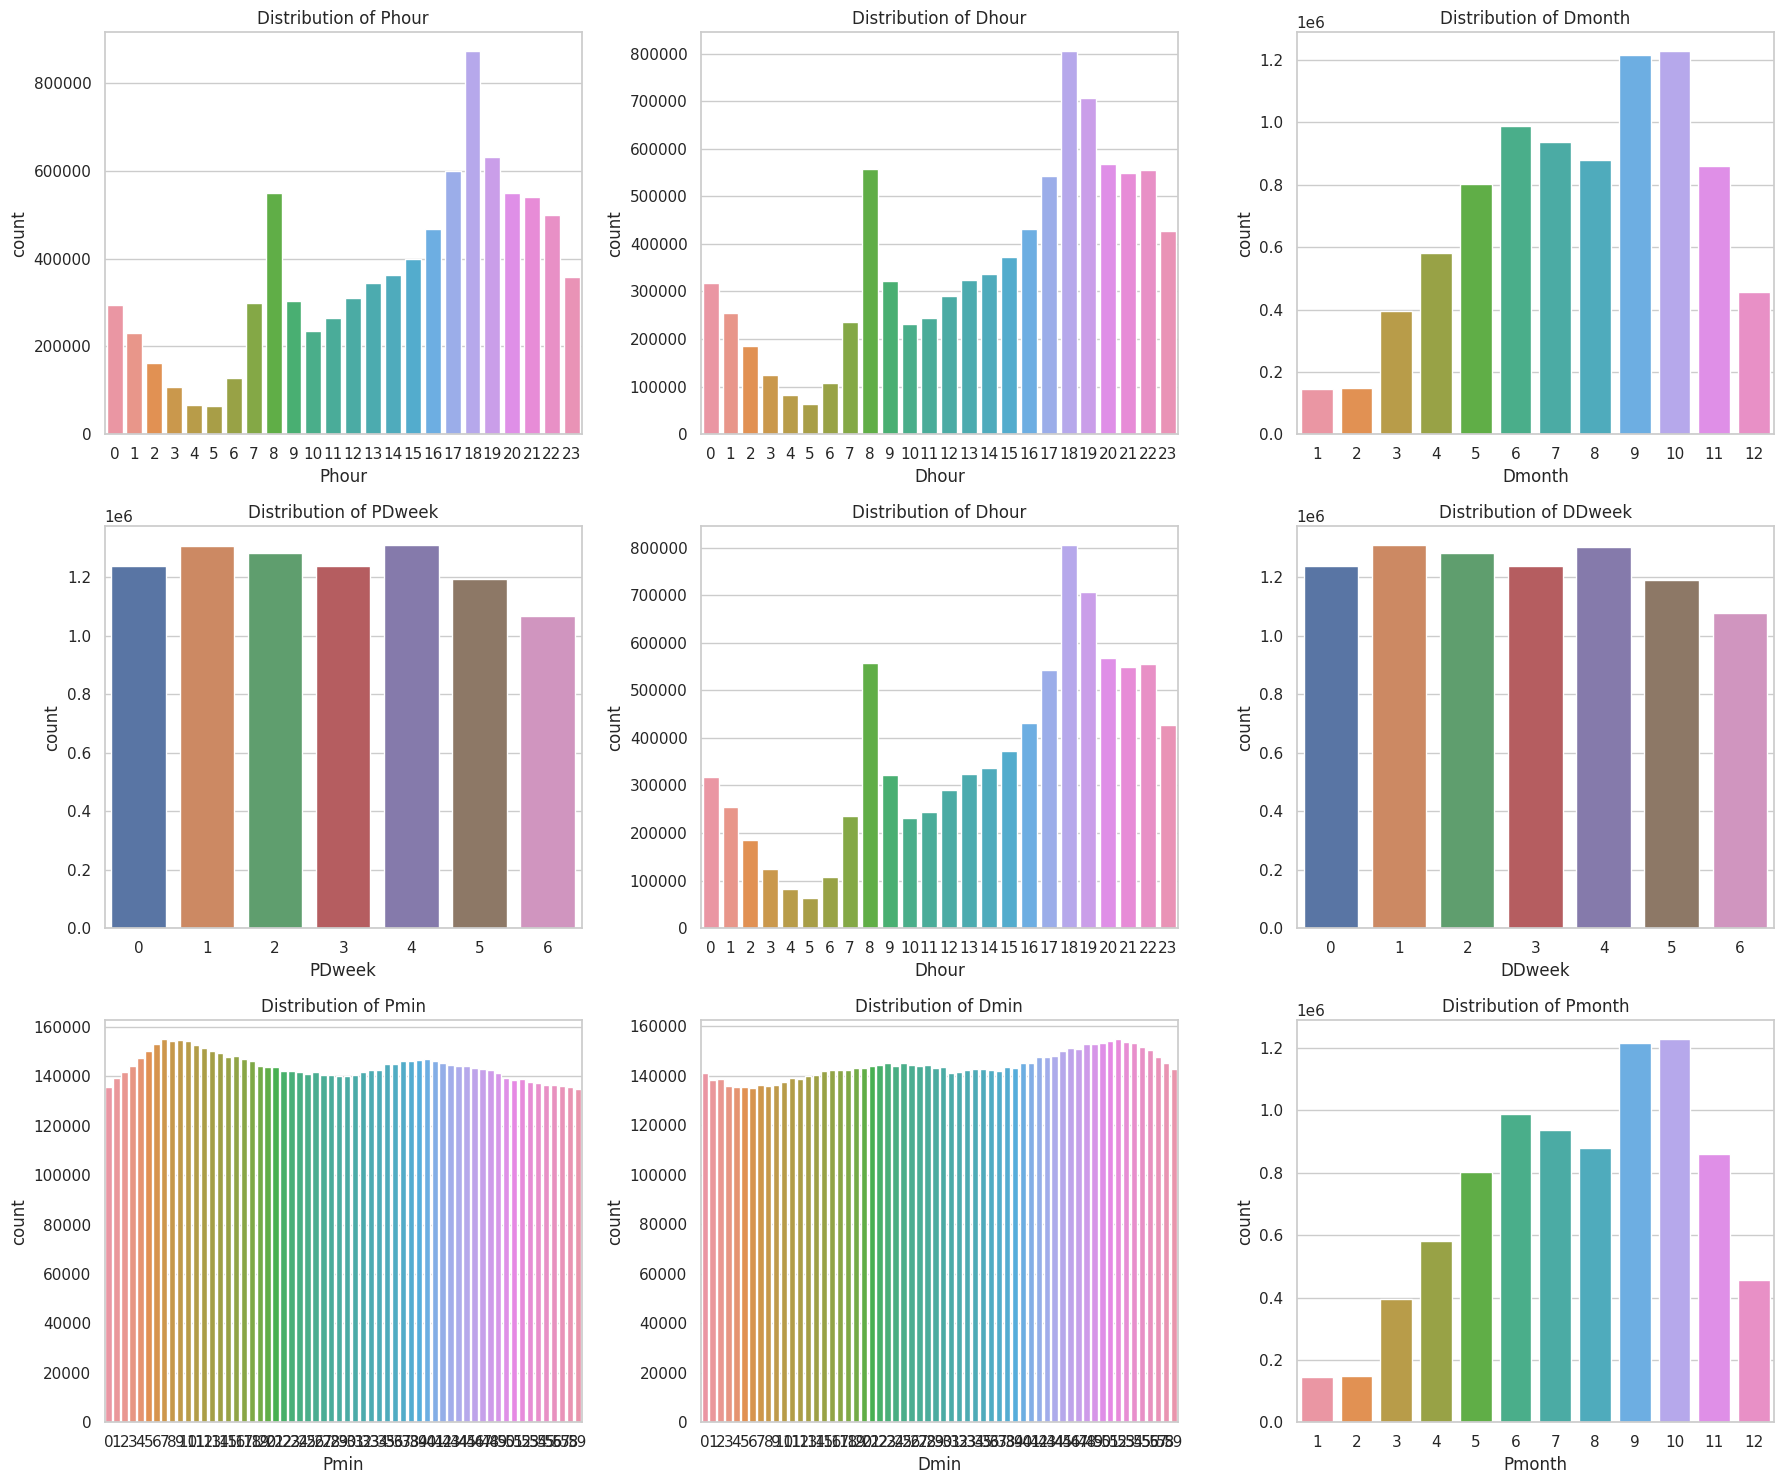

In [ ]:
col_names = ['Phour', 'Dhour','Dmonth', 'PDweek', 'Dhour', 'DDweek', 'Pmin', 'Dmin','Pmonth']

# Set up subplots with adjusted plot size
fig, axes = plt.subplots(3,3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.countplot(x=filtered_data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

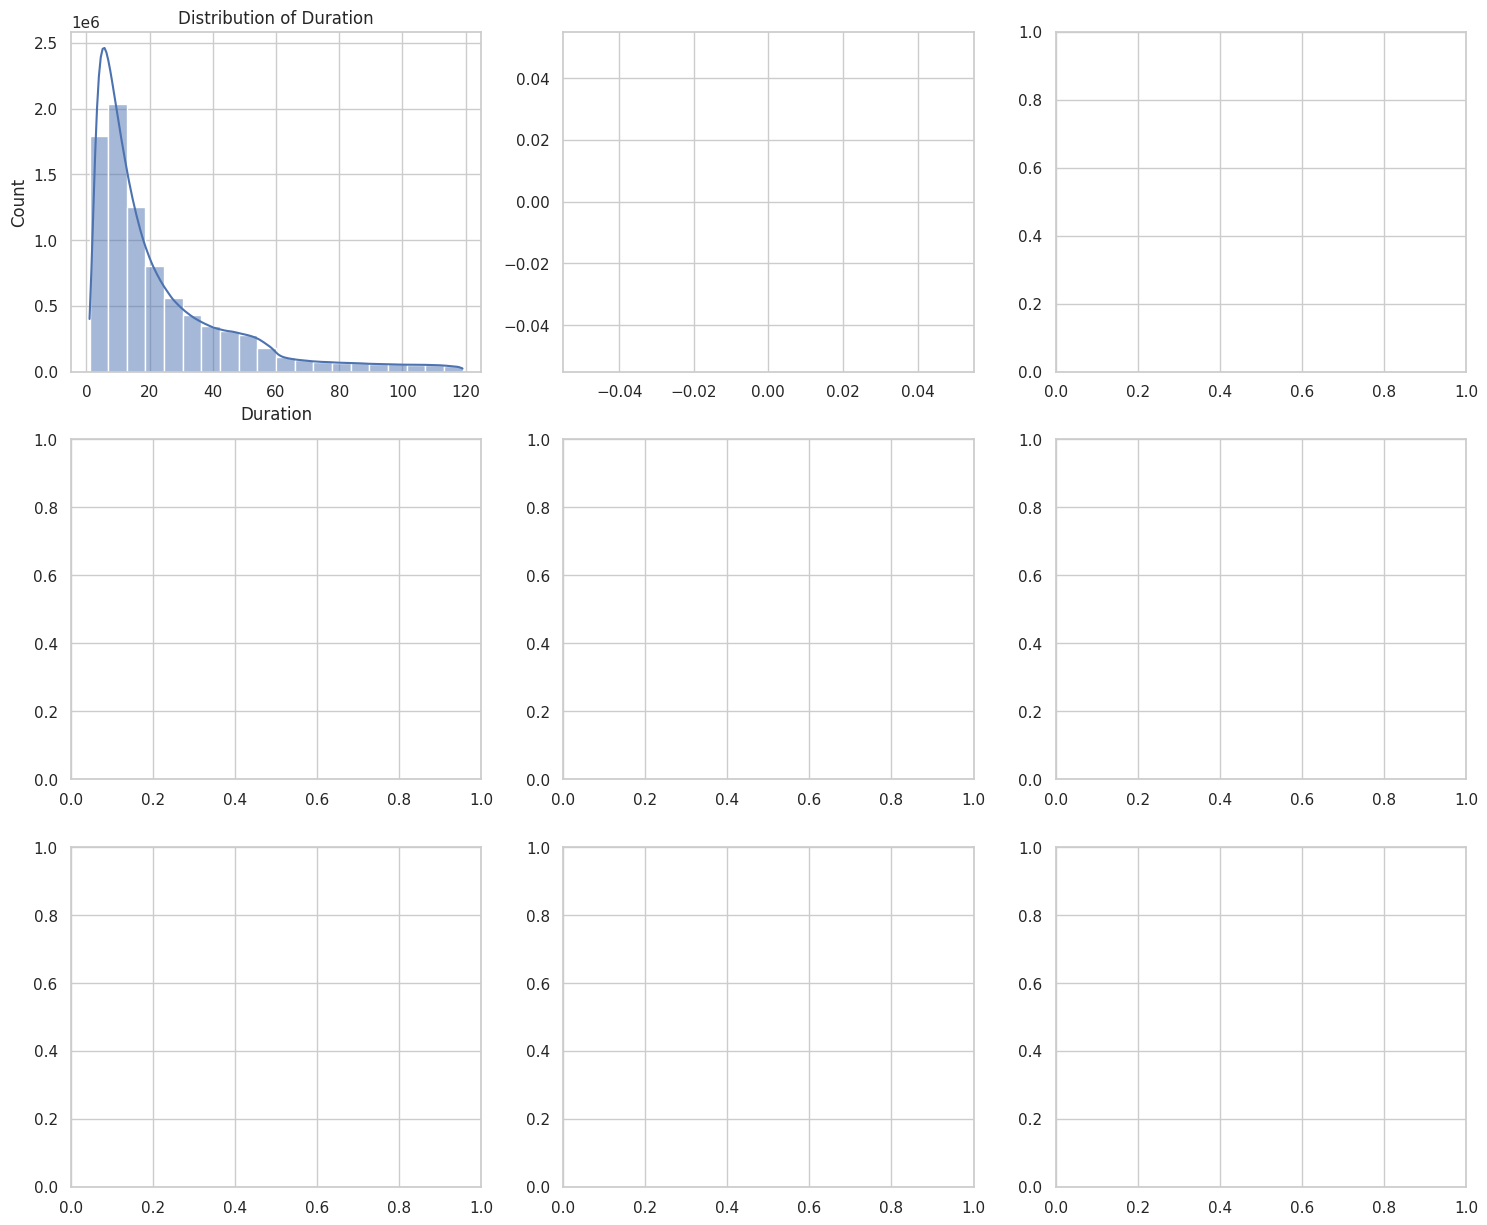

In [ ]:
col_names = ['Duration', 'Distance', 'Wind', 'Temp', 'GroundTemp', 'Humid', 'Precip', 'Snow', 'Dust']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.histplot(filtered_data[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

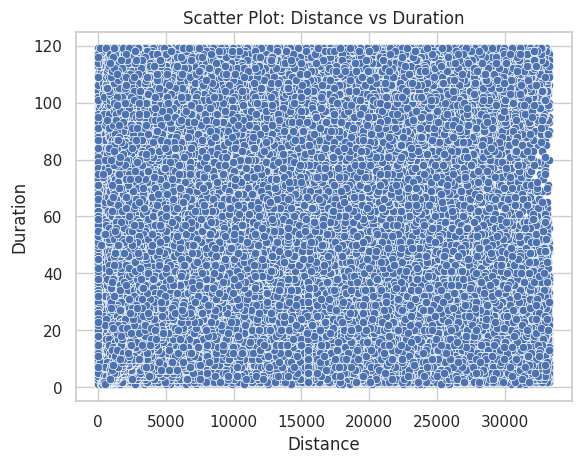

In [ ]:
sns.scatterplot(x=filtered_data['Distance'], y=filtered_data['Duration'])
plt.title('Scatter Plot: Distance vs Duration')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.show()

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for PLong and PLatd
axes[0].scatter(filtered_data['PLong'], filtered_data['PLatd'], s=20, alpha=0.7, c='blue', marker='o', edgecolors='k')
axes[0].set_xlabel('PLongitude')
axes[0].set_ylabel('PLatitude')
axes[0].set_title('Pickup Locations')
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(filtered_data['DLong'], filtered_data['DLatd'], s=20, alpha=0.7, c='green', marker='o', edgecolors='k')
axes[1].set_xlabel('DLongitude')
axes[1].set_ylabel('DLatitude')
axes[1].set_title('Dropoff Locations')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = filtered_data.corr()

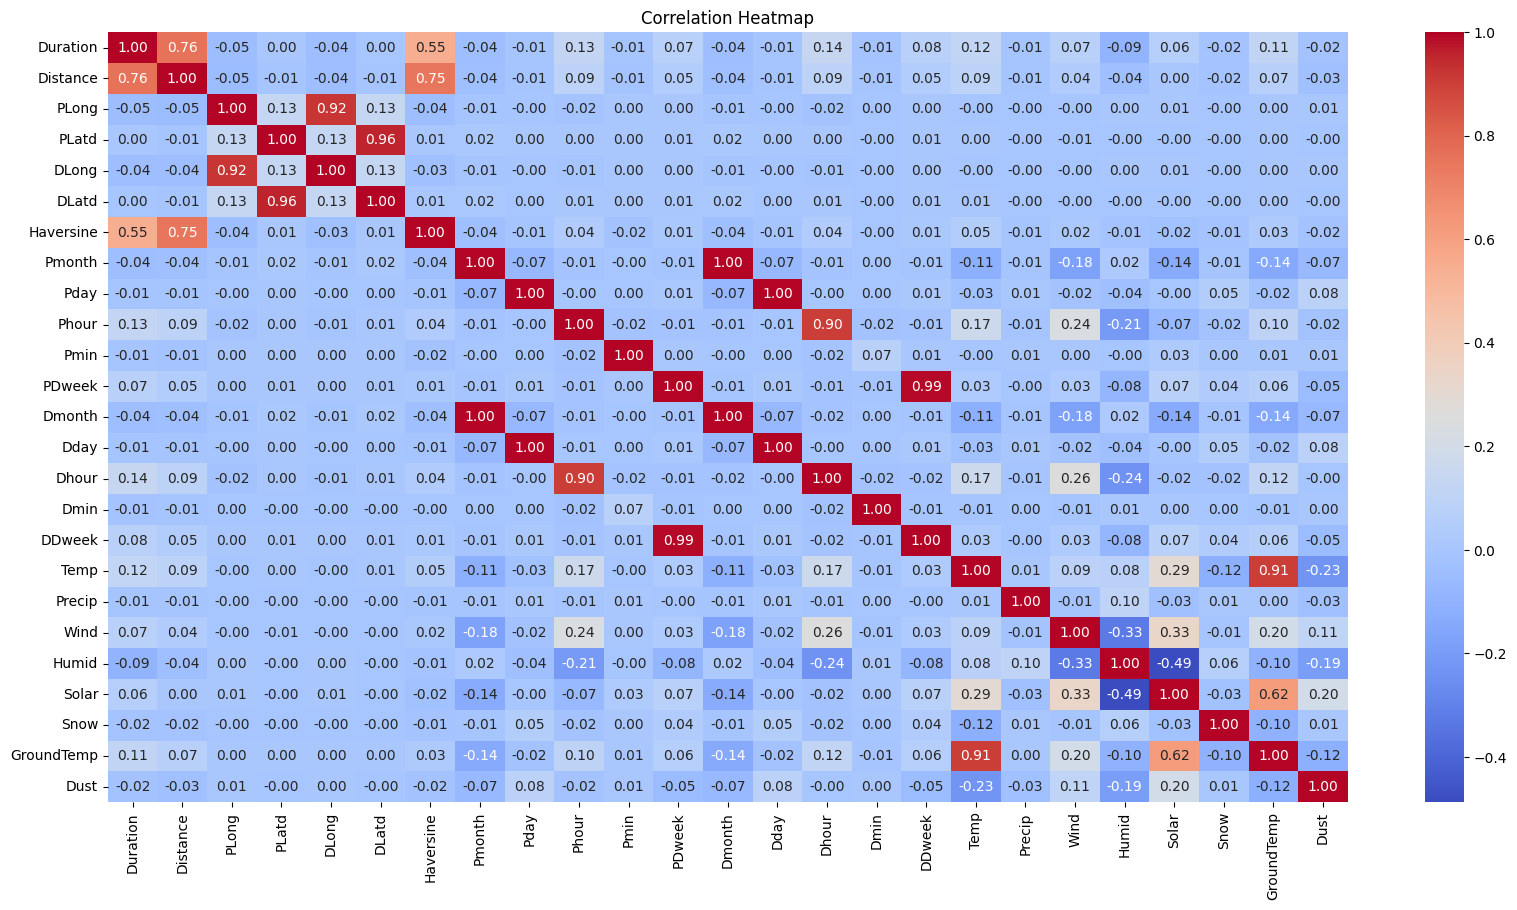

In [ ]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
absolute_correlations = correlation_matrix['Duration'].abs().drop('Duration')

# Sort the correlations in descending order
sorted_correlations = absolute_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

Distance      0.758090
Haversine     0.549611
Dhour         0.135650
Phour         0.127037
Temp          0.122738
GroundTemp    0.113155
Humid         0.092496
DDweek        0.075541
PDweek        0.074768
Wind          0.071532
Solar         0.064097
PLong         0.050374
DLong         0.043591
Pmonth        0.043288
Dmonth        0.043140
Dust          0.020631
Snow          0.015929
Dmin          0.011453
Precip        0.009401
Dday          0.008869
Pday          0.008829
Pmin          0.007383
PLatd         0.000948
DLatd         0.000366
Name: Duration, dtype: float64


In [ ]:
upper_triangular = np.triu(correlation_matrix, k=1)

# Define a threshold for correlation magnitude
threshold = 0.2 # You can adjust this threshold as needed

# Get the indices of correlations above the threshold
significant_indices = np.where(np.abs(upper_triangular) >= threshold)

# Get the column names
column_names = filtered_data.columns

# Print the significant correlations and their corresponding column names
for row, col in zip(*significant_indices):
    if row != col:
        column1_name = column_names[row]
        column2_name = column_names[col]
        correlation = correlation_matrix.iloc[row, col]
        sign = "Positive" if correlation >= 0 else "Negative"
        print(f"{sign} correlation between columns '{column1_name}' and '{column2_name}': {abs(correlation):.2f}")


Positive correlation between columns 'Duration' and 'Distance': 0.76
Positive correlation between columns 'Duration' and 'Haversine': 0.55
Positive correlation between columns 'Distance' and 'Haversine': 0.75
Positive correlation between columns 'PLong' and 'DLong': 0.92
Positive correlation between columns 'PLatd' and 'DLatd': 0.96
Positive correlation between columns 'Pmonth' and 'Dmonth': 1.00
Positive correlation between columns 'Pday' and 'Dday': 1.00
Positive correlation between columns 'Phour' and 'Dhour': 0.90
Positive correlation between columns 'Phour' and 'Wind': 0.24
Negative correlation between columns 'Phour' and 'Humid': 0.21
Positive correlation between columns 'PDweek' and 'DDweek': 0.99
Positive correlation between columns 'Dhour' and 'Wind': 0.26
Negative correlation between columns 'Dhour' and 'Humid': 0.24
Positive correlation between columns 'Temp' and 'Solar': 0.29
Positive correlation between columns 'Temp' and 'GroundTemp': 0.91
Negative correlation between col

### Model

In [18]:
df = filtered_data.drop(['PLatd', 'DLatd', 'Pday', 'Pmin', 'Dday', 'Dmin', 'Precip', 'Snow', 'Dust', 'Humid',
    'DDweek',
    'PDweek',
    'PLong',
    'DLong',
    'Pmonth',
    'Dmonth',
    'Dust',
    'Snow',
    'Dmin',
    'Precip',
    'Dday',
    'Pday',
    'Pmin',
    'PLatd',
    'DLatd'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [20]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Duration']), df['Duration'], test_size=0.25, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6477608, 8) (6477608,)
(2159203, 8) (2159203,)


In [21]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((6477608, 8), (2159203, 8))

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'ElasticNetRegression': {"model": ElasticNet(), "params": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}}
}


In [23]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

In [ ]:
model_results = eval_models()

LinearRegression 14.788545970216735 {}
RidgeRegression 14.788545863302511 {'alpha': 1.0}
LassoRegression 14.794530935973174 {'alpha': 0.1}


In [17]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,14.812556,14.842911,8.636294,8.640629,{}
RidgeRegression,14.812556,14.842911,8.636295,8.64063,{'alpha': 1.0}
LassoRegression,14.820202,14.849002,8.664822,8.668967,{'alpha': 0.1}
ElasticNetRegression,14.825808,14.853162,8.7075,8.711292,"{'alpha': 0.1, 'l1_ratio': 0.9}"
